In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goldman-sachs-stock-data-updated-till-1jul2021/GS.csv


In [2]:
df= pd.read_csv("/kaggle/input/goldman-sachs-stock-data-updated-till-1jul2021/GS.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900
1,1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700
2,1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700
3,1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300
4,1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400
...,...,...,...,...,...,...,...
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800


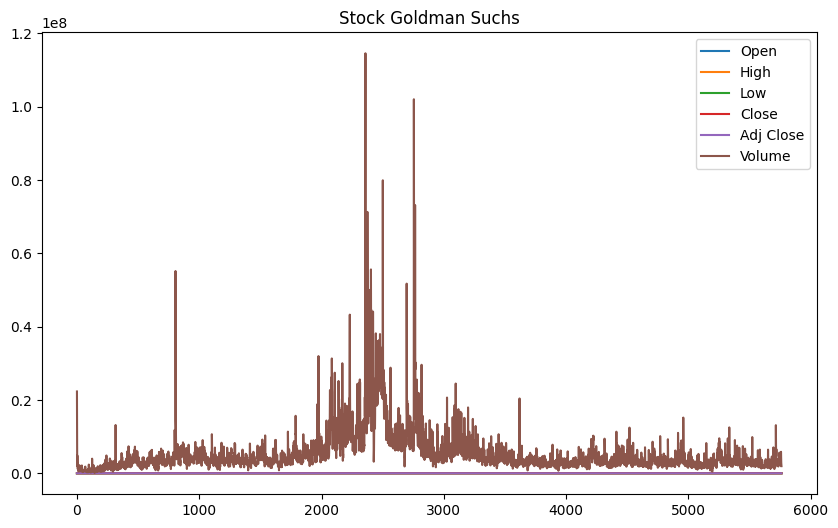

In [4]:
df.plot(figsize=(10, 6), title='Stock Goldman Suchs');

In [5]:
df['SMA1'] = df['Close'].rolling(42).mean()

In [6]:
df['SMA2'] = df['Close'].rolling(258).mean()

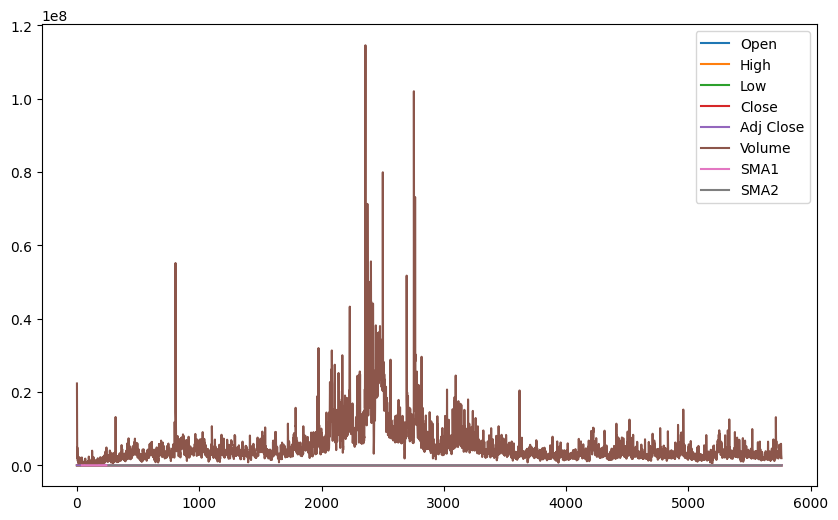

In [7]:
df.plot(figsize=(10, 6));

In [8]:
df.dropna(inplace=True)

In [9]:
df['p'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)

In [10]:
 df['p'] = df['p'].shift(1)

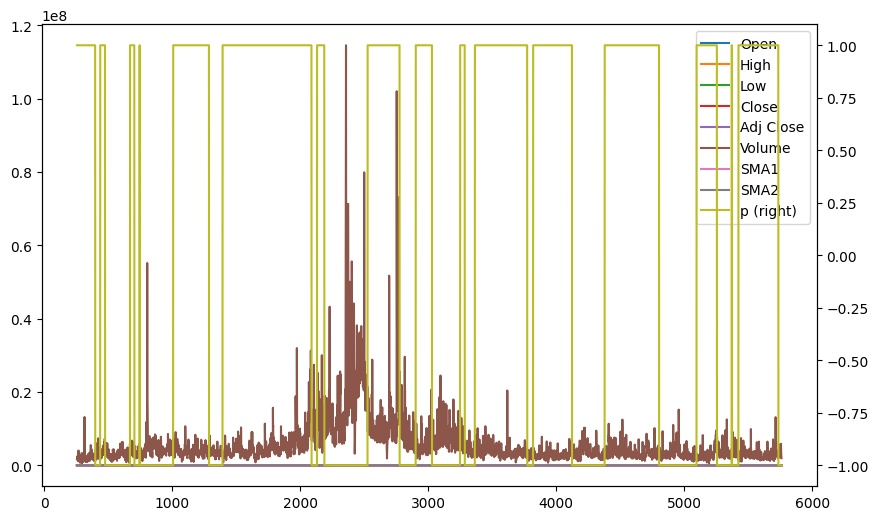

In [11]:
df.plot(figsize=(10, 6), secondary_y='p');

# Calcul Log Returns r

In [12]:
df['r'] = np.log(df['Close'] / df['Close'].shift(1))

In [13]:
df.dropna(inplace=True)

#   Calcul The Strategy Returns S

In [14]:
df['s'] = df['p'] * df['r']

# Calcul The Gross Performance

In [15]:
df[['r', 's']].sum().apply(np.exp)

r    3.926774
s    0.672615
dtype: float64

In [16]:
df[['r', 's']].sum().apply(np.exp) - 1

r    2.926774
s   -0.327385
dtype: float64

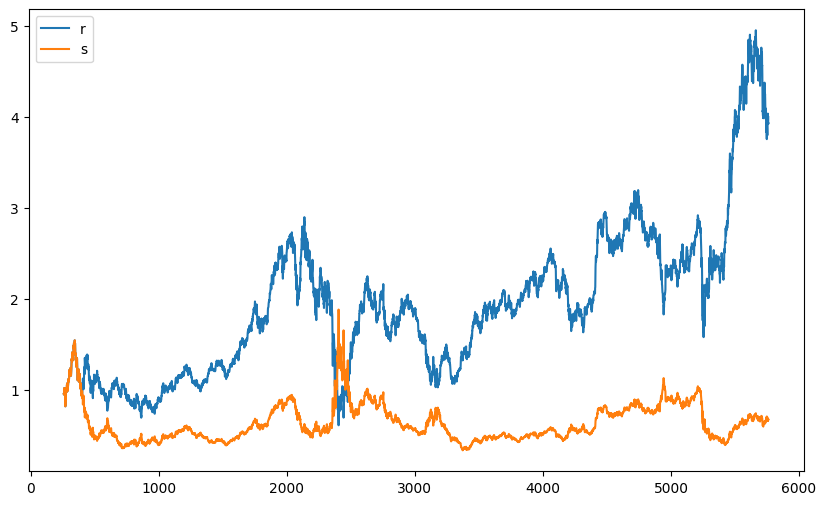

In [17]:
df[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [18]:
sum(df['p'].diff() !=0) + 2 

34

In [19]:
pc = 0.005

In [20]:
df['S_'] = np.where(df['p'].diff() !=0, df['s'] - pc, df['s'])

# Strategy Performance For The Entry Trade 

In [21]:
df['S_'].iloc[0] -= pc



/tmp/ipykernel_18/2967496443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S_'].iloc[0] -= pc


# Strategy Preformance For The Exit Trade

In [22]:
df['S_'].iloc[-1] -= pc

/tmp/ipykernel_18/3588301791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S_'].iloc[-1] -= pc


In [23]:
df[['r', 's', 'S_']][df['p'].diff() != 0 ]

,r,s,S_
258,-0.050141,-0.050141,-0.060141
400,-0.009091,0.009091,0.004091
439,0.010603,0.010603,0.005603
477,0.044396,-0.044396,-0.049396
672,-0.010390,-0.010390,-0.015390
706,-0.006856,0.006856,0.001856
747,-0.029102,-0.029102,-0.034102
748,0.024816,-0.024816,-0.029816
1009,0.012613,0.012613,0.007613
1289,-0.004383,0.004383,-0.000617


In [24]:
df[['r', 's', 'S_']].sum().apply(np.exp)

r     3.926774
s     0.672615
S_    0.567462
dtype: float64

In [25]:
df[['r', 's','S_']].sum().apply(np.exp) - 1

r     2.926774
s    -0.327385
S_   -0.432538
dtype: float64

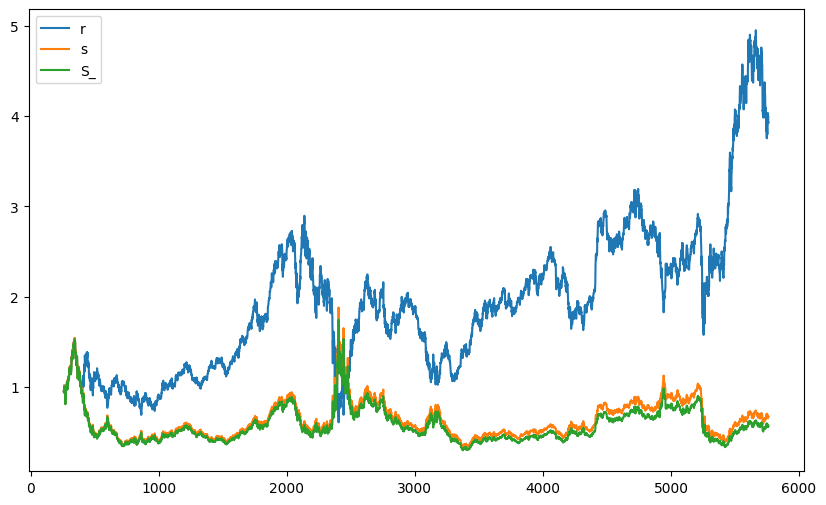

In [26]:
df[['r', 's', 'S_']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [27]:
df[['r', 's', 'S_']].std()

r     0.022779
s     0.022780
S_    0.022790
dtype: float64

In [28]:
import math

In [29]:
df[['r', 's', 'S_']].std() * math.sqrt(252)

r     0.361603
s     0.361622
S_    0.361786
dtype: float64